In [ ]:
import pandas as pd
import numpy as np
import random

def generate_stock(days=100, initial_price=100, volatility=0.02, drift=0.0005):
    """
    Generates random stock price data using geometric Brownian motion.
    
    Parameters:
    - days: number of days to generate
    - initial_price: initial stock price
    - volatility: daily volatility, default 2%
    - drift: daily drift, default 0.05%
    """
    
    np.random.seed(random.randint(0, 10000))
    
    prices = [initial_price]
    
    for i in range(1, days):
        change = np.random.normal(drift, volatility)
        new_price = prices[-1] * (1 + change)
        prices.append(new_price)
    
    df = pd.DataFrame({
        'day_number': range(1, days + 1),
        'value': prices
    })
    
    df.to_csv('stock.csv', index=False)
    print(f"Generated {days} days of data for the stock")
    print(f"Initial price: {initial_price:.2f}")
    print(f"Final price: {prices[-1]:.2f}")
    print(f"Change: {((prices[-1] - initial_price) / initial_price * 100):.2f}%")
    
    return df

# Example usage:
df = generate_stock(days=100)

# You can adjust parameters:
# df = generate_stock(days=250, initial_price=50, volatility=0.03, drift=0.001)

Wygenerowano 100 dni danych dla spółki
Cena początkowa: 100.00
Cena końcowa: 109.96
Zmiana: 9.96%


Wykres zapisany jako 'wykres_spolki.png'


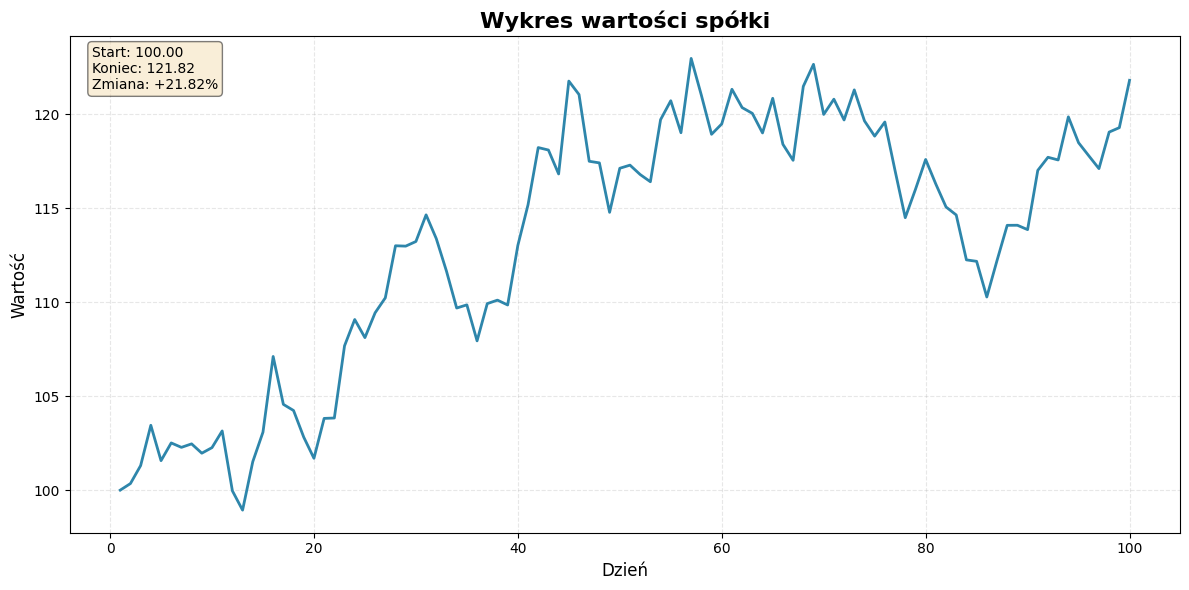

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Function generating data
def generate_stock(days=100, initial_price=100, volatility=0.02, drift=0.0005):
    np.random.seed(random.randint(0, 10000))
    prices = [initial_price]
    
    for i in range(1, days):
        change = np.random.normal(drift, volatility)
        new_price = prices[-1] * (1 + change)
        prices.append(new_price)
    
    df = pd.DataFrame({
        'day_number': range(1, days + 1),
        'value': prices
    })
    
    df.to_csv('stock.csv', index=False)
    return df

# Function plotting the chart
def plot_stock_chart(csv_file='stock.csv'):
    df = pd.read_csv(csv_file)
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['day_number'], df['value'], linewidth=2, color='#2E86AB')
    
    plt.title('Stock Value Chart', fontsize=16, fontweight='bold')
    plt.xlabel('Day', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, alpha=0.3, linestyle='--')
    
    start_price = df['value'].iloc[0]
    end_price = df['value'].iloc[-1]
    change_percent = ((end_price - start_price) / start_price) * 100
    
    plt.text(0.02, 0.98, f'Start: {start_price:.2f}\nEnd: {end_price:.2f}\nChange: {change_percent:+.2f}%',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
             fontsize=10)
    
    plt.tight_layout()
    plt.savefig('stock_chart.png', dpi=300, bbox_inches='tight')
    print("Chart saved as 'stock_chart.png'")
    plt.show()

# Usage - generate and plot:
df = generate_stock(days=100)
plot_stock_chart('stock.csv')